<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/ML_Class_3rd%264th_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import sys
assert sys.version_info>=(3,5)

In [111]:
import sklearn
assert sklearn.__version__>="0.20"

In [112]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [113]:
np.random.seed(42)

In [114]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [115]:
PROJECT_ROOT_DIR="."
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
  print("Saving figure ", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [116]:
#hard voting classifier

In [117]:
heads_proba=0.51
coin_tosses=(np.random.rand(10000,10)<heads_proba).astype(np.int32)
cumulative_heads_ratio=np.cumsum(coin_tosses, axis=0)/np.arange(1,10001).reshape(-1,1)

(0.0, 10000.0, 0.42, 0.58)

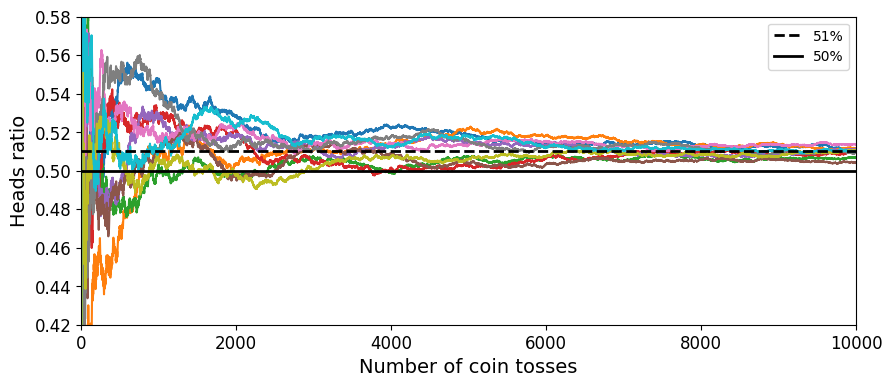

In [118]:
plt.figure(figsize=(10,4))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51], "k--", linewidth=2, label="51%")
plt.plot([0,10000],[0.5,0.5], "k-", linewidth=2, label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="upper right")
plt.axis([0,10000,0.42,0.58])

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [120]:
log_clf=LogisticRegression(solver='lbfgs', random_state=42) #lbfgs="Limited-memory Broyden-Fletcher-Goldfarb-Shanno
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma='scale', random_state=42)

In [121]:
voting_clf=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [122]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [123]:
from sklearn.metrics import accuracy_score
for clf in(log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [125]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

In [126]:
print(accuracy_score(y_test, y_pred))

0.904


In [127]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree=tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [128]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
  x1s=np.linspace(axes[0], axes[1], 100)
  x2s=np.linspace(axes[2], axes[3], 100)
  x1,x2=np.meshgrid(x1s, x2s)
  X_new=np.c_[x1.ravel(), x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)
  custom_cmap=ListedColormap(["#fafab0", "#9898ff", "#ff9900"])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if contour:
    custom_cmap2=ListedColormap(["#7d7d58","#4c4c7f","#507d50"])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", alpha=alpha)
  plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0, 0.5, '')

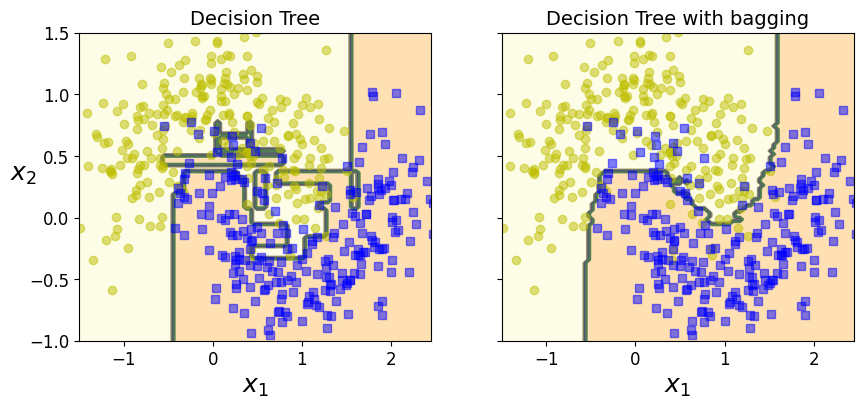

In [129]:
fig,axes=plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with bagging", fontsize=14)
plt.ylabel("")

ML Class continues on 4th october, 2023

In [130]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [131]:
y_pred=bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


In [132]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

SVM revision

In [133]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]

In [134]:
setosa_or_versicolor = (y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

svm_clf=SVC(kernel='linear', C=float("1.0"))
svm_clf.fit(X,y)

SVC(kernel='linear')

(0.0, 5.5, 0.0, 2.0)

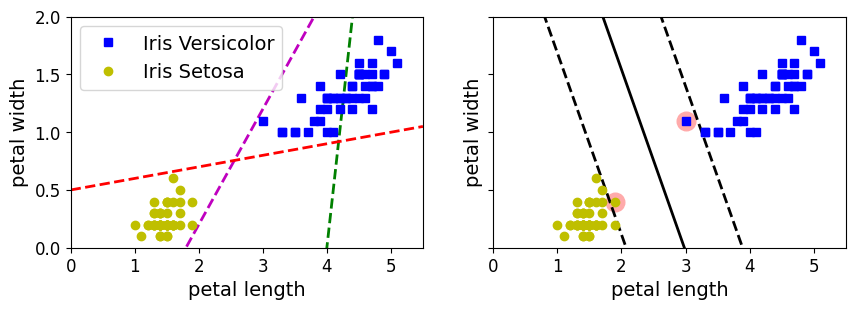

In [135]:
x0=np.linspace(0,5.5,200)
pred1=5*x0-20
pred2=x0-1.8
pred3=0.1*x0+0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w=svm_clf.coef_[0]
  b=svm_clf.intercept_[0]

  x0=np.linspace(xmin, xmax, 200)
  decision_boundary=-w[0]/w[1]*x0-b/w[1]

  margin=1/w[1]
  gutter_up=decision_boundary+margin
  gutter_down=decision_boundary-margin

  svs=svm_clf.support_vectors_
  plt.scatter(svs[:,0],svs[:,1], s=180, facecolors="#FFAAAA")
  plt.plot(x0, decision_boundary, "k-", linewidth=2)
  plt.plot(x0, gutter_up, "k--", linewidth=2)
  plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes=plt.subplots(ncols=2, figsize=(10,3), sharey=True)
plt.sca(axes[0])
plt.plot(x0, pred1, "g--", linewidth=2)
plt.plot(x0, pred2, "m--", linewidth=2)
plt.plot(x0, pred3, "r--", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris Versicolor")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="Iris Setosa")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0.0,5.5,0,2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.axis([0,5.5,0,2])
#Large margin classifier

RNN - Recurrent Neural Networks

In [136]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2=np.random.rand(4, batch_size, 1)
  time=np.linspace(0, 1, n_steps)
  series=0.5*np.sin((time-offsets1)*(freq1*10+10))
  series+=0.2*np.sin((time-offsets2)*(freq2*20+20))
  series+=0.1*(np.random.rand(batch_size, n_steps)-0.5)
  return series[...,np.newaxis].astype(np.float32)

In [137]:
np.random.seed(42)

n_steps=50
series=generate_time_series(10000, n_steps+1)
X_train, y_train=series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid=series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test=series[9000:, :n_steps], series[9000:, -1]

In [138]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

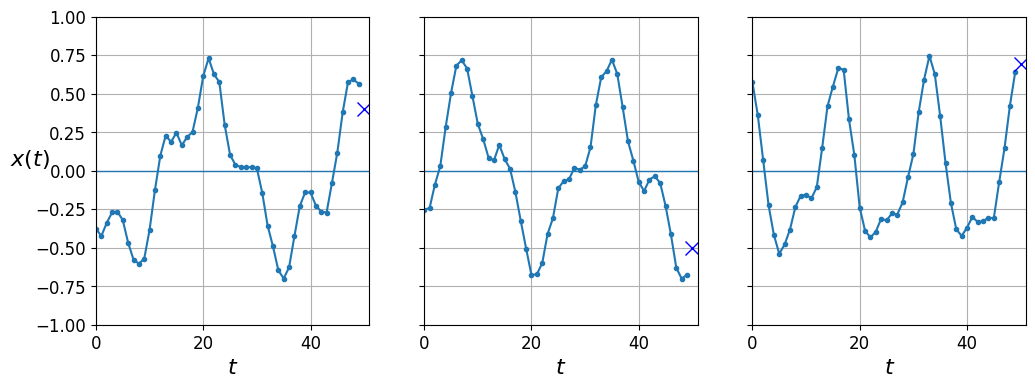

In [139]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
  plt.plot(series, ".-")
  if y is not None:
    plt.plot(n_steps, y, "bx", markersize=10)
  if y_pred is not None:
    plt.plot(n_steps, y_pred, "ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0,0,100, linewidth=1)
  plt.axis([0, n_steps+1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

for col in range(3):
  plt.sca(axes[col])
  plot_series(X_valid[col, :, 0], y_valid[col, 0],
              y_label=("$x(t)$" if col==0 else None))

In [140]:
import tensorflow as tf
from tensorflow import keras

In [141]:
y_pred=X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

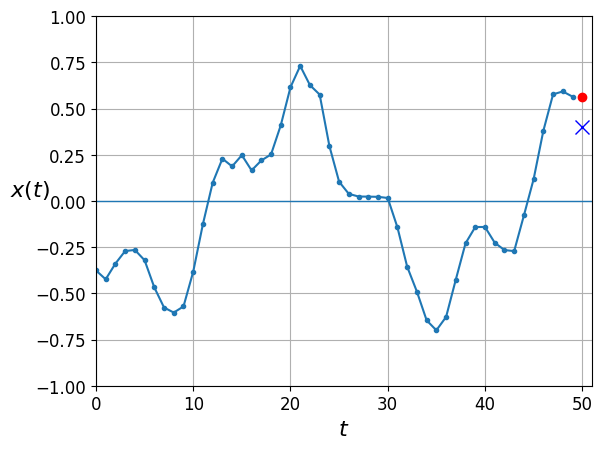

In [142]:
plot_series(X_valid[0,:,0], y_valid[0,0], y_pred[0,0])

In [143]:
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [144]:
model.compile(loss="mse", optimizer="adam")
history=model.fit(X_train, y_train, epochs=20,
                  validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1209 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.0205
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0135
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 6/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 9/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0049

In [145]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0036


0.0036283419467508793

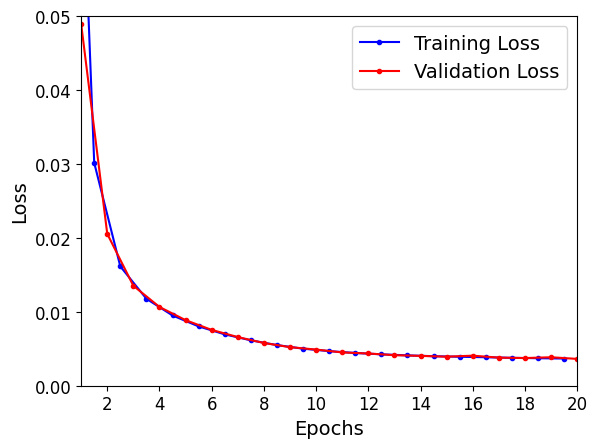

In [146]:
def plot_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss))+0.5, loss, "b.-", label="Training Loss")
  plt.plot(np.arange(len(val_loss))+1, val_loss, "r.-", label="Validation Loss")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) #import matplotlib as mpl
  plt.axis([1,20,0,0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

plot_learning_curves(history.history["loss"], history.history["val_loss"])